### Проектная работа
* Темы:
    1. Описательная статистика (статистические характеристики, графики, взаимосвязь величин, дисперсионный и факторный анализ)
    2. Предиктивная аналитика (линейная регрессия, логистическая регрессия)

#### Работа: Оценка зависимости бизнес-результата от своевременности работы с задачами 
Контекст: сотрудники получают задачи с потенциальными сделками. После получения задачи в течение заданного времени сотрудник должен сформировать подзадачи, соответствующие сделкам. Подзадачи должны перейти в статус заключенных или несостоявшихся сделок. Есть признак того, что заданное время было просрочено. Гипотеза – если сотрудник берёт задачи в работу и формирует подзадачи в срок, то его доля заключенных сделок выше.
Признак: доля задач, взятых в работу в срок. Переменная: доля заключенных сделок. Возможно, стоит проверить на зависимость от количества потенциальных сделок - на случай, если «хорошим» сотрудникам поступает больше сделок в работу.
Цель работы – проверить, влияет ли дисциплина (своевременное взятие задач в работу) на результат.

Расчет показал, что зависимости между параметром своевременного взятия задач в работу и результативностью при заключении сделок нет. Коэффициент корреляции 0,06.
Для бизнеса это означает, что не имеет смысла отслеживать своевременность как показатель, контролировать по этому параметру сотрудников. Возможно стоит от него отказаться.

В учебных целях на данных был проведен расчет линейной регрессии, дисперсионный анализ, факторный анализ.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

##### Загрузка и обработка обезличенного датасета 

In [3]:
df = pd.read_excel("project_dataset.xlsx", sheet_name="Export Worksheet")
df.head()

,ID,BEGIN_DT,END_DT,CREATE_DT,FIRST_ISSUE_CREATE_DT,FIRST_CLOSE_DT,ISSUE_STAGE_NAME,EXPIRED,TB_NAME_ISU,USER_ID,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK
0,25923,21.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,720030,1,0,1,0
1,25722,21.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,3194418,1,0,1,0
2,25787,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,3194418,1,0,1,0
3,25650,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,1266400,1,0,1,0
4,25849,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,1848864,1,0,1,0


In [4]:
def df_info(input_dataframe):
    ''' Определение формы датафрейма. 
    '''
    print(input_dataframe.info())
    return print("Форма: {}\n\nСтолбцы: {}\n\nИндексы: {}\n".format(input_dataframe.shape, 
                                                                      input_dataframe.columns, input_dataframe.index))

df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 14 columns):
ID                       5408 non-null int64
BEGIN_DT                 5408 non-null object
END_DT                   5408 non-null object
CREATE_DT                5408 non-null object
FIRST_ISSUE_CREATE_DT    3003 non-null object
FIRST_CLOSE_DT           49 non-null object
ISSUE_STAGE_NAME         5408 non-null object
EXPIRED                  5408 non-null object
TB_NAME_ISU              5408 non-null object
USER_ID                  5408 non-null int64
COUNT_SUB_ISSUE          5408 non-null int64
COUNT_DEAL               5408 non-null int64
EXPIRED_MARK             5408 non-null int64
CANCEL_ACCEPT_MARK       5408 non-null int64
dtypes: int64(6), object(8)
memory usage: 591.6+ KB
None
Форма: (5408, 14)

Столбцы: Index(['ID', 'BEGIN_DT', 'END_DT', 'CREATE_DT', 'FIRST_ISSUE_CREATE_DT',
       'FIRST_CLOSE_DT', 'ISSUE_STAGE_NAME', 'EXPIRED', 'TB_NAME_ISU',
       'USER_ID', 'COUNT_SUB

In [5]:
print(df["EXPIRED"].value_counts(), "\n")
print(df["TB_NAME_ISU"].value_counts(), "\n")
print(df["ISSUE_STAGE_NAME"].value_counts(), "\n")
print(df["FIRST_CLOSE_DT"].value_counts(), "\n")

df1 = df

Отказ            2570
Просрочено       1614
Закрыта          1223
Не просрочено       1
Name: EXPIRED, dtype: int64 

Волго-Вятский банк             833
Среднерусский банк             653
Северо-Западный банк           554
Центрально-Черноземный банк    542
Поволжский банк                483
Юго-Западный банк              478
Уральский банк                 459
Сибирский банк                 414
Байкальский банк               386
Московский банк                309
Дальневосточный банк           297
Name: TB_NAME_ISU, dtype: int64 

Отказ        2570
В работе     1360
Закрыта      1223
Загружена     255
Name: ISSUE_STAGE_NAME, dtype: int64 

30.07.19    45
31.07.19     2
29.07.19     2
Name: FIRST_CLOSE_DT, dtype: int64 



In [6]:
''' 
# Добавление бинарных признаков
df = df.join(pd.get_dummies(df["EXPIRED"], prefix = "EXPIRED"))
df = df.join(pd.get_dummies(df["ISSUE_STAGE_NAME"], prefix = "ISSUE_STAGE_NAME"))
df = df.drop(['ID', 'BEGIN_DT', 'END_DT', 'CREATE_DT', 'FIRST_ISSUE_CREATE_DT',
       'FIRST_CLOSE_DT', 'ISSUE_STAGE_NAME', 'EXPIRED'], axis = 1)
df.head()
'''

' \n# Добавление бинарных признаков\ndf = df.join(pd.get_dummies(df["EXPIRED"], prefix = "EXPIRED"))\ndf = df.join(pd.get_dummies(df["ISSUE_STAGE_NAME"], prefix = "ISSUE_STAGE_NAME"))\ndf = df.drop([\'ID\', \'BEGIN_DT\', \'END_DT\', \'CREATE_DT\', \'FIRST_ISSUE_CREATE_DT\',\n       \'FIRST_CLOSE_DT\', \'ISSUE_STAGE_NAME\', \'EXPIRED\'], axis = 1)\ndf.head()\n'

In [7]:
# добваить кол-во задач-строк
df_tmp1 = df.groupby(["USER_ID"]).size()
df_tmp2 = df.groupby("USER_ID")['COUNT_SUB_ISSUE',"COUNT_DEAL","EXPIRED_MARK","CANCEL_ACCEPT_MARK"].sum()
df = pd.concat([df_tmp2, df_tmp1 ], axis=1 )
df.rename(columns={df.columns[4]: 'TASK_TOTAL'}, inplace=True)
df.head()

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL
USER_ID,,,,,
213380,59,25,7,19,108
236084,15,3,1,0,18
249998,15,0,2,16,49
250106,32,1,7,21,78
256624,46,7,9,2,73


In [8]:
# Доля заключенных сделок 
df["DEAL_RATIO"] = df["COUNT_DEAL"] / df["COUNT_SUB_ISSUE"]

In [9]:
df.head()

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL,DEAL_RATIO
USER_ID,,,,,,
213380,59,25,7,19,108,0.423729
236084,15,3,1,0,18,0.200000
249998,15,0,2,16,49,0.000000
250106,32,1,7,21,78,0.031250
256624,46,7,9,2,73,0.152174


In [10]:
# Доля задач, отработанных вовремя
df["INTIME_RATIO"] = 1 - df["EXPIRED_MARK"] / df["TASK_TOTAL"]
df.head()

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL,DEAL_RATIO,INTIME_RATIO
USER_ID,,,,,,,
213380,59,25,7,19,108,0.423729,0.935185
236084,15,3,1,0,18,0.200000,0.944444
249998,15,0,2,16,49,0.000000,0.959184
250106,32,1,7,21,78,0.031250,0.910256
256624,46,7,9,2,73,0.152174,0.876712


In [11]:
# Определение статистических параметров по столбцам
df.describe()

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL,DEAL_RATIO,INTIME_RATIO
count,105.000000,105.000000,105.000000,105.000000,105.000000,101.000000,105.000000
mean,38.876190,7.800000,13.333333,12.847619,51.504762,0.205801,0.736293
std,29.362684,10.168201,16.733009,17.219611,35.317005,0.197315,0.236649
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,1.000000,2.000000,1.000000,23.000000,0.058824,0.600000
50%,34.000000,5.000000,7.000000,7.000000,47.000000,0.152778,0.813953
75%,59.000000,10.000000,19.000000,16.000000,70.000000,0.300000,0.921053
max,119.000000,57.000000,77.000000,98.000000,171.000000,0.857143,1.000000


In [12]:
print("В среднем задач, отработано вовремя:", df["INTIME_RATIO"].mean(), "\nВ среднем доля заключенных сделок:", df["DEAL_RATIO"].mean())

print("Сигма для задач:", df["INTIME_RATIO"].std(ddof=1), "; Сигма для сделок" ,df["DEAL_RATIO"].std(ddof=1))



В среднем задач, отработано вовремя: 0.7362931627808684 
В среднем доля заключенных сделок: 0.2058009715452671
Сигма для задач: 0.23664940233572185 ; Сигма для сделок 0.19731453719618205


In [13]:
def distribution(df):
    """ Доверительный интервал значений датафрейма
    """
    n = df.count()
    mean = df.mean()
    std = df.std(ddof=1)

    t = 1.9840

    return (mean - 1.9840 * std / np.sqrt(n), mean + 1.9840 * std / np.sqrt(n))

print("Доверительный интервал для задач:", distribution(df["INTIME_RATIO"]) )
print("Доверительный интервал для сделок:", distribution(df["DEAL_RATIO"]) )

Доверительный интервал для задач: (0.6904734428507411, 0.7821128827109958)
Доверительный интервал для сделок: (0.16684804749369928, 0.24475389559683494)


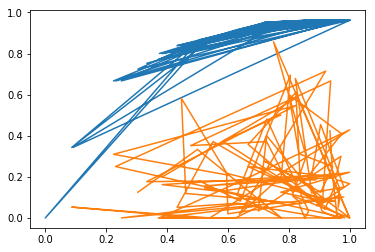

In [14]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    
    return samples[samples < x].shape[0] / samples.shape[0]

ox = df["INTIME_RATIO"]
oy = np.array([edf(df["DEAL_RATIO"], x) for x in ox])

plt.plot(ox, oy)
plt.plot(df["INTIME_RATIO"], df["DEAL_RATIO"])

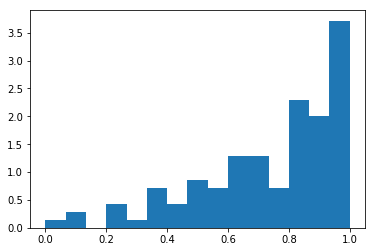

In [15]:
# Гистограмма распределения взятых вовремя задач
plt.hist(df["INTIME_RATIO"], density=True, bins=15)
plt.show()

/Users/daniil/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daniil/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


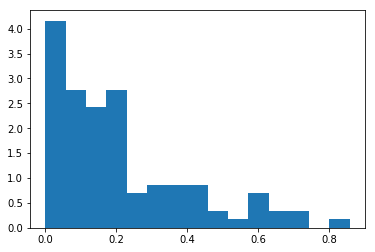

In [16]:
# Гистограмма распределения отработанных вовремя сделок
plt.hist(df["DEAL_RATIO"], density=True, bins=15)
plt.show()

Text(0, 0.5, 'INTIME_RATIO')

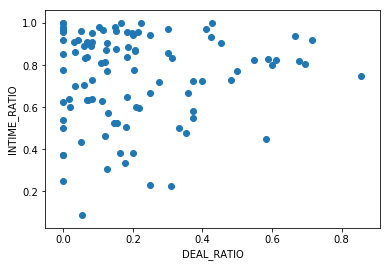

In [17]:

plt.scatter(df["DEAL_RATIO"],df["INTIME_RATIO"])
plt.xlabel("DEAL_RATIO")
plt.ylabel("INTIME_RATIO")

In [18]:
print(" Определение зависимости между задачами, взятыми в работу вовремя и конвертацией сделок")
print(df[["DEAL_RATIO","INTIME_RATIO"]].corr())
print("Зависимость практически отсутствует")

print("\nПроверка на ранговые коэффициенты корреляции Кендалла и Спирмена")
print(df[["DEAL_RATIO","INTIME_RATIO"]].corr(method='kendall'))
print(df[["DEAL_RATIO","INTIME_RATIO"]].corr(method='spearman'))

 Определение зависимости между задачами, взятыми в работу вовремя и конвертацией сделок
              DEAL_RATIO  INTIME_RATIO
DEAL_RATIO       1.00000       0.06857
INTIME_RATIO     0.06857       1.00000
Зависимость практически отсутствует

Проверка на ранговые коэффициенты корреляции Кендалла и Спирмена
              DEAL_RATIO  INTIME_RATIO
DEAL_RATIO      1.000000     -0.012646
INTIME_RATIO   -0.012646      1.000000
              DEAL_RATIO  INTIME_RATIO
DEAL_RATIO      1.000000     -0.019954
INTIME_RATIO   -0.019954      1.000000


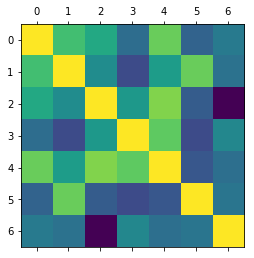

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL,DEAL_RATIO,INTIME_RATIO
COUNT_SUB_ISSUE,1,0.538549,0.393604,0.0189606,0.652598,-0.0369973,0.103357
COUNT_DEAL,0.538549,1,0.216275,-0.174095,0.320359,0.65362,0.0509489
EXPIRED_MARK,0.393604,0.216275,1,0.288604,0.711706,-0.0783041,-0.523567
CANCEL_ACCEPT_MARK,0.0189606,-0.174095,0.288604,1,0.620441,-0.175473,0.180241
TASK_TOTAL,0.652598,0.320359,0.711706,0.620441,1,-0.109234,0.030058
DEAL_RATIO,-0.0369973,0.65362,-0.0783041,-0.175473,-0.109234,1,0.0685705
INTIME_RATIO,0.103357,0.0509489,-0.523567,0.180241,0.030058,0.0685705,1


In [19]:
# Проверка корреляции с другими признаками
X_corr = df.corr()
plt.matshow(X_corr)
plt.show()
X_corr.style.background_gradient(cmap='coolwarm')

In [20]:
"""
pd.isnull(df)
df.isnull().sum()
df.dropna()
"""


'\npd.isnull(df)\ndf.isnull().sum()\ndf.dropna()\n'

In [21]:
# Заменяем пропущенные значения средними
df["DEAL_RATIO"].fillna(df["DEAL_RATIO"].mean(), inplace = True)
df_info(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 213380 to 3547152
Data columns (total 7 columns):
COUNT_SUB_ISSUE       105 non-null int64
COUNT_DEAL            105 non-null int64
EXPIRED_MARK          105 non-null int64
CANCEL_ACCEPT_MARK    105 non-null int64
TASK_TOTAL            105 non-null int64
DEAL_RATIO            105 non-null float64
INTIME_RATIO          105 non-null float64
dtypes: float64(2), int64(5)
memory usage: 6.6 KB
None
Форма: (105, 7)

Столбцы: Index(['COUNT_SUB_ISSUE', 'COUNT_DEAL', 'EXPIRED_MARK', 'CANCEL_ACCEPT_MARK',
       'TASK_TOTAL', 'DEAL_RATIO', 'INTIME_RATIO'],
      dtype='object')

Индексы: Int64Index([ 213380,  236084,  249998,  250106,  256624,  541000,  609180,
             614176,  614532,  619558,
            ...
            3501246, 3507116, 3509716, 3511920, 3516404, 3520812, 3531546,
            3534184, 3534190, 3547152],
           dtype='int64', name='USER_ID', length=105)



In [22]:
# Построение линейной регрессии по формулам
x2 = df[["INTIME_RATIO"]].values
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2.shape
y2 = df[["DEAL_RATIO"]].values.reshape(-1, 1)
XTX = x2.T.dot(x2)

print(np.linalg.det(XTX))
print(XTX)

XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)

print("Коэффициенты линейной регессии (пересечение оси, наклон):",b)


611.55210071433
[[105.          77.31078209]
 [ 77.31078209  62.74770598]]
Коэффициенты линейной регессии (пересечение оси, наклон): [[0.1686437 ]
 [0.05046532]]


In [23]:
# Проверка с помощью sklearn
x = df[["INTIME_RATIO"]].values
y = df["DEAL_RATIO"].values

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x, y)
y_pred = slr.predict(x)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: 0.05
Intercept: 0.17


In [24]:
y1 = np.array(df[["INTIME_RATIO"]].values)
y2 = np.array(df[["DEAL_RATIO"]].values)

n1 = y1.shape[0]
n2 = y2.shape[0]

n1, n2

(105, 105)

In [25]:
# Дисперсионный анализ - оценка совпадения распределений
y1 = np.array(df[["INTIME_RATIO"]].values)
y2 = np.array(df[["DEAL_RATIO"]].values)

n1 = y1.shape[0]
n2 = y2.shape[0]
print(n1, n2)

y1_mean = y1.mean()
y2_mean = y2.mean()
print(y1_mean, y2_mean)


y = np.concatenate([y1, y2])
y_mean = y.mean()
print( y_mean)

S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

print(S2_F, S2_res)

S2_F + S2_res , ((y - y_mean) ** 2).sum()

k = 3
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

print(sigma2_F, sigma2_res)

T = sigma2_F / sigma2_res
print("\nT =",T)

alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
print("F_crit =" ,F_crit)
print("\nT > F_crit означает, что различия в параметрах Cвоевременность работы с задачей и \nКонверсия сделок статистически значимы")

105 105
0.7362931627808684 0.2058009715452671
0.47104706716306777
14.774653160502366 9.717608379983204
7.387326580251183 0.046944968019242535

T = 157.36141469354394
F_crit = 3.039508254152558

T > F_crit означает, что различия в параметрах Cвоевременность работы с задачей и 
Конверсия сделок статистически значимы


In [26]:
# Факторный анализ
print("разница между средними", y1_mean - y2_mean, "общее среднее", y_mean)
# 

print((y_mean - t * np.std(y, ddof=1) / np.sqrt(n), y_mean + t * np.std(y, ddof=1) / np.sqrt(n)))

разница между средними 0.5304921912356013 общее среднее 0.47104706716306777


NameError: name 't' is not defined

In [ ]:
sigma_y1 = np.std(y1, ddof=1)
sigma_y2 = np.std(y2, ddof=1)
T = (y1_mean - y2_mean) / np.sqrt(sigma_y1**2 / n1 + sigma_y2**2 / n2)
T

In [ ]:
n1 + n2 - 2
# Значение t-критерия Стьюдента при p=0.05 для 100 по таблице =  1,984 (1,982 для 110)

In [27]:
t = stats.t.ppf(1 - 0.05 / 2, df=n1 + n2 - 2)
t
# Значение t-критерия Стьюдента для выборки

1.9714346585183504

Значение рассчитанного t-критерия Стьюдента 17.78 больше табличного 1.971, значит различия сравниваемых величин статистически значимы.